# Weather and Crime in New York



### Brain Zhou, Kyle Chang



---




## Introduction

New York City is the ___ est of America. Simply put most adjectives you would use on cities would fit New York City. There are 8.8 million people that live in the city limits, and countless different things happening every moment. This all translates to a lot of data waiting to be analyzed. You can see some of the available data sets that the city government provides [here](https://opendata.cityofnewyork.us). In this tutorial we will be focusing on the question of how weather affects crime in New York.


Before we start going through coding portion of the tutorial, we should talk about why we chose crime and weather. In a practical sense there is a plethora of data on these two topics within New York, which cuts down on the work we need to do in getting the data. Second, intuitively we know that weather is apart of everyday life, so it would make sense that it has some effect on crime occurences.


## Brief Overview 

For this tutorial we will be working with a crime dataset and a weather dataset. We will use the weather data to gain insight into any relationship between the two. So some of the feature of the weather data we will use is the daily average tempature, precipitation, and average wind speed.

The general steps in this tutorial are

* Preprocessing data
* Reading in the data
* Tidying the data
* Data analysis
* ML & Hypothesis testing
* Insights

## Getting Started

We will be using Python 3 , specifically a python notebook, along with some additional libaries to make later work easier. 

These libaries include:

*   [Pandas](https://pandas.pydata.org)
*   [Numpy](http://www.numpy.org)
*   [Scikit-learn](https://scikit-learn.org/stable/)
*   [Scipy](https://scipy.org/)
*   [Seaborn](https://seaborn.pydata.org)
*   [Matplotlib](https://matplotlib.org)
*   [Sodapy](https://dev.socrata.com/consumers/getting-started.html)

The datasets that we will be working with are:
*  [NYPD Historic Complaint Data](https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i) ([docs](https://dev.socrata.com/foundry/data.cityofnewyork.us/9s4h-37hy))
*  [NOAA Daily Summeries](https://github.com/kwch3693/Crime_Weather_New_York.github.io/blob/master/documents/daily_weather.csv) ([docs](https://github.com/kwch3693/Crime_Weather_New_York.github.io/blob/master/documents/daily_documentation.pdf))

The NYPD data will be accessed through an API and the NOAA data will be a csv. you are welcome to go explore the data, appropriate documentation is linked by their respective datasets.

In [0]:
!pip install sodapy

In [0]:
import pandas as pd
import numpy as np
import seaborn
from sodapy import Socrata
from matplotlib import pyplot as plt


## Preprocessing the Data

Before doing any analysis/coding the first step is to look at the data, and see if there are any problems with it. Often times datasets have errors in input or missing data. So taking a look at the data beforehand is nessary before doing anything else. In the context of this tutorial we have found that our weather data has large swaths of missing temperature data. These sections of missing temperature cover continuous spans of time, with the largest beginning in late 2011 and ending in late 2013, so we concluded that the missing data was MCAR. We therefore opted to work in a more recent timeframe where there is not missing data. We have also linked a reference for other ways for dealing with missing data [here](https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4). 

## Reading in the Data

For this step the main goal is to get the dataset to dataframe form. Pandas has a bunch of methods that do this for you, however in this situation we will be using read csv and from records methods.


In [0]:
weather = pd.read_csv('daily_weather.csv')
weather['DATE'] = pd.to_datetime(weather['DATE'])
weather.head()


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,AWND_ATTRIBUTES,FMTM,FMTM_ATTRIBUTES,...,WT18,WT18_ATTRIBUTES,WT19,WT19_ATTRIBUTES,WT21,WT21_ATTRIBUTES,WT22,WT22_ATTRIBUTES,WV01,WV01_ATTRIBUTES
0,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.6386,-73.7622,3.4,2000-01-01,7.38,",,X",1545.0,",,X",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.6386,-73.7622,3.4,2000-01-02,7.61,",,X",1826.0,",,X",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.6386,-73.7622,3.4,2000-01-03,3.13,",,X",1045.0,",,X",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.6386,-73.7622,3.4,2000-01-04,14.54,",,X",1841.0,",,X",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.6386,-73.7622,3.4,2000-01-05,17.67,",,X",851.0,",,X",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In the cell above we read in the weather dataset. As you can see from the output there are a bunch of different features to use. We will be focusing on:

* Date
* Avg Temp
* Preciptation
* Avg Wind Speed

New York City uses Socrata to store its data, so we need to perform a get request to the servers through the Socrata API to obtain crime data. Then we'll read the data into a dataframe using the `from_records()` method.

In [0]:
client = Socrata("data.cityofnewyork.us", None)
results = client.get("9s4h-37hy",where = 'date_extract_y(cmplnt_fr_dt) >= 2014' ,limit=960000)
complaints = pd.DataFrame.from_records(results)
complaints['cmplnt_fr_dt'] = pd.to_datetime(complaints['cmplnt_fr_dt'])
complaints.head()

,addr_pct_cd,boro_nm,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_num,cmplnt_to_dt,cmplnt_to_tm,crm_atpt_cptd_cd,hadevelopt,housing_psa,...,station_name,susp_age_group,susp_race,susp_sex,transit_district,vic_age_group,vic_race,vic_sex,x_coord_cd,y_coord_cd
0,44,BRONX,2015-06-11,11:36:00,111222720,NaN,NaN,COMPLETED,NaN,NA,...,NaN,NaN,UNKNOWN,M,NaN,45-64,BLACK,M,1007933,241724
1,44,BRONX,2015-09-03,17:10:00,292167760,NaN,NaN,COMPLETED,NaN,NA,...,NaN,18-24,BLACK,M,NaN,NaN,UNKNOWN,E,1004449,243104
2,14,MANHATTAN,2014-05-13,09:15:00,626543116,2014-05-13T00:00:00.000,09:30:00,COMPLETED,NaN,NA,...,NaN,NaN,NaN,NaN,NaN,25-44,WHITE,F,988269,211485
3,42,BRONX,2014-03-08,18:30:00,886573328,2014-03-08T00:00:00.000,19:30:00,COMPLETED,NaN,NA,...,NaN,NaN,BLACK,F,NaN,25-44,BLACK,F,1010572,238539
4,113,QUEENS,2015-04-27,16:00:00,487791415,NaN,NaN,COMPLETED,NaN,NA,...,NaN,25-44,BLACK,M,NaN,25-44,BLACK,F,1047726,187713


Now that we have the data, we will be focusing on:

* Complaint date


## Tidying the Data

In this step we essentially want to grab all the features we need and place them into a `pandas` DataFrame for later analysis. We will have to fix up some of the crime data. This step may have more work depending on what you are trying to analyze and your datasets. So from the crime data we want the frequency of complaints per day for this tutorial. This is so we can match up features like wind, temperature, and precipitation which occur in a daily cycle. 

In [0]:
# unique series of dates from crime data
unique_dates = complaints['cmplnt_fr_dt'].dropna().unique()

# The slow way
#counts = []
#for date in unique_dates:
#  if(date != pd.NaT):
#    s = complaints.where(complaints['cmplnt_fr_dt'] == date)['cmplnt_fr_dt'].dropna()
#    counts.append(len(s))

# The fast way. Same results, but it doesn't get bogged down by for loops
counts = complaints.dropna(subset = ['cmplnt_fr_dt']).groupby('cmplnt_fr_dt').size()[unique_dates].reset_index()[0]

So now that we have the frequency per date, we can put together all the data we need into a dataframe. First we will create a new dataframe to house the data we care about. Then create columns for all the types of data. Finally put in all the data from the crime and weather datasets.

In [0]:
#create new dataframe
pl = pd.DataFrame()
pl['dates'] = unique_dates
pl['freq'] = counts
pl['PRCP'] = 0.0
pl['TAVG'] = 0.0
pl['AWND'] = 0.0
#matching dates and placing respective data into correct date
for i, row in pl.iterrows():
    arr = []
    arr = weather[weather['DATE'] == pl.at[i, 'dates']]
    pl.at[i,'PRCP'] = arr['PRCP']
    pl.at[i,'TAVG'] = arr['TAVG']
    pl.at[i,'AWND'] = arr['AWND']

pl.head()

,dates,freq,PRCP,TAVG,AWND
0,2015-06-11,692,0.0,75.0,9.62
1,2015-09-03,732,0.0,81.0,5.37
2,2014-05-13,727,0.0,64.0,11.63
3,2014-03-08,711,0.0,42.0,11.41
4,2015-04-27,627,0.0,55.0,14.76


Now that we have out formated dataframe, we are ready to do some analysis of the data.

## Exploratory Data Analysis

For this step we will look for relationships between our features and the frequency of crimes. We will do this by using a mixture of matplotlib's pyplot graphs and seaborn's graphs. We will be graphing each of the features to the frequency per date.

Our first graph will be a scatterplot with precipation as the independent variable and frequency as the dependent variable.

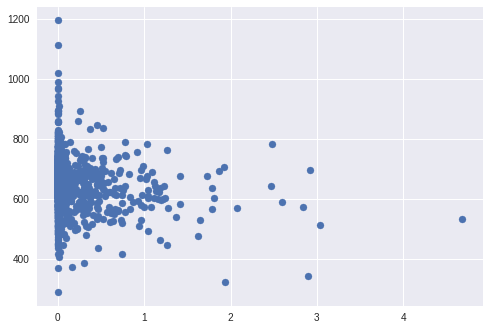

In [0]:
plt.scatter(pl['PRCP'], pl['freq'])

This is not too clear on if there is any relationship, but maybe with some further testing we will find something more concrete.

Onto our next graph, which will be a scatterplot with avg temp as the independent variable and frequency as the dependent variable.

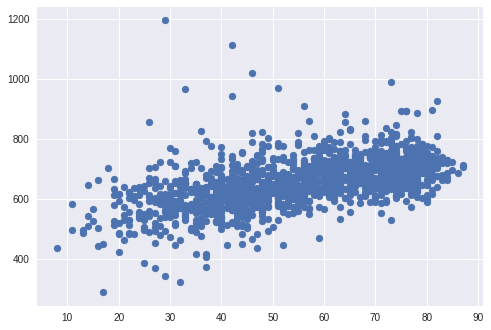

In [0]:
plt.scatter(pl['TAVG'], pl['freq'])

This is more promising, there is a positive trend with temp to frequency.

Our next graph will  be a scatterplot with average wind speed as the independent variable and frequency as the dependent variable.

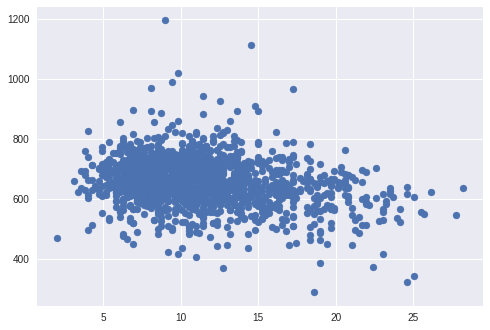

In [0]:
plt.scatter(pl['AWND'], pl['freq'])

It looks like there might be trends here, but it's hard to tell. We'll split the precipitation range into five equally-sized intervals and check the mean number of daily complaints for each interval. We'll then do the same for average temperature and wind speed.

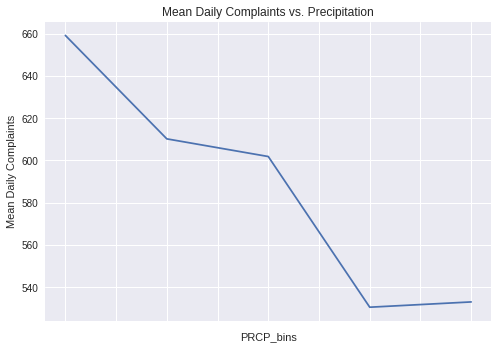

In [0]:
pl['PRCP_bins'] = pd.cut(pl['PRCP'], bins = 5)
pl.groupby('PRCP_bins')['freq'].mean().plot(kind = 'line')
plt.ylabel('Mean Daily Complaints')
_ = plt.title('Mean Daily Complaints vs. Precipitation')

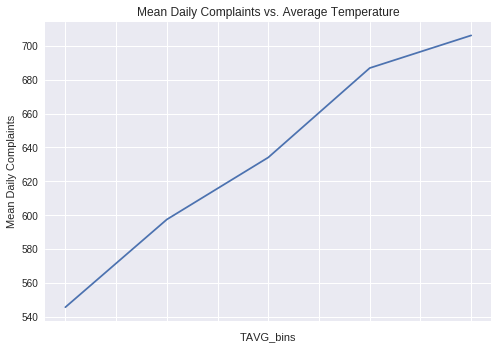

In [0]:
pl['TAVG_bins'] = pd.cut(pl['TAVG'], bins = 5)
pl.groupby('TAVG_bins')['freq'].mean().plot()
plt.ylabel('Mean Daily Complaints')
_ = plt.title('Mean Daily Complaints vs. Average Temperature')

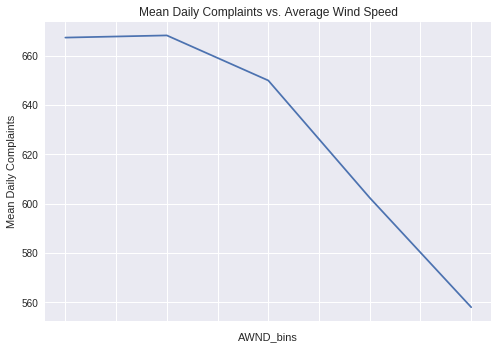

In [0]:
pl['AWND_bins'] = pd.cut(pl['AWND'], bins = 5)
pl.groupby('AWND_bins')['freq'].mean().plot()
plt.ylabel('Mean Daily Complaints')
_ = plt.title('Mean Daily Complaints vs. Average Wind Speed')

We can also use violin plots to give us a better look at what the actual distributions look like.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


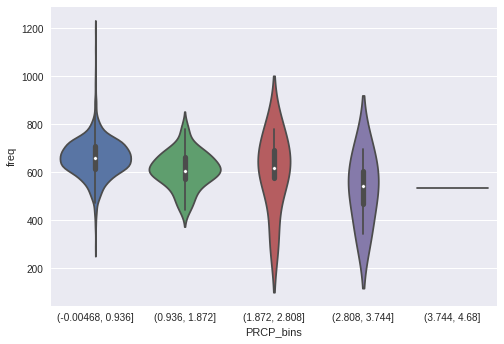

In [0]:
seaborn.violinplot(pl['PRCP_bins'], pl['freq'])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


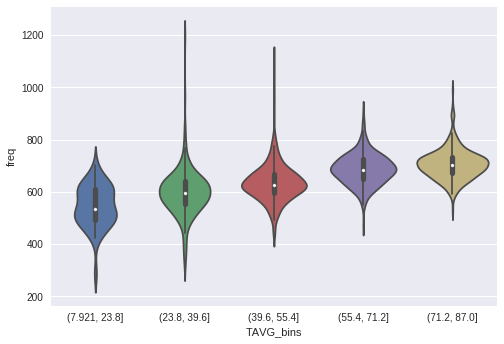

In [0]:
seaborn.violinplot(pl['TAVG_bins'], pl['freq'])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


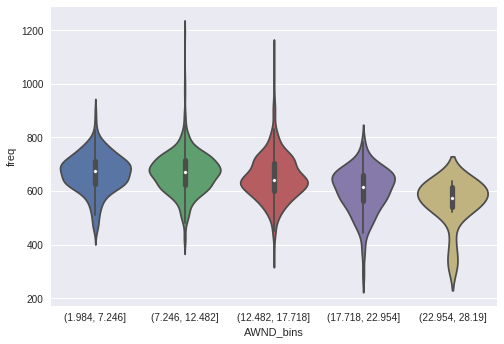

In [0]:
seaborn.violinplot(pl['AWND_bins'], pl['freq'])

It seems clear that the number of complaints per day is negatively correlated with precipitation and average wind speed, and is positively correlated with average temperature. Let's investigate this.

## Hypothesis testing & Machine Learning

We'll start by using `scikit-learn` to fit a linear model to the data. This should give us a good idea what to try next.

In [0]:
from sklearn.linear_model import LinearRegression

# The .sample(frac = 1) shuffles the rows of X
# We need to shuffle X and y together, or we'll be trying to predict the
# frequency of complaints from random noise.
X = np.array(pl[['PRCP', 'TAVG', 'AWND', 'freq']].sample(frac = 1))
y = X[:, -1]
X = X[:, :-1]

linreg = LinearRegression()
linreg.fit(X, y)

# Display R^2 score, also known as the coefficient of determination
linreg.score(X, y)

0.3222876535407482

The $R^2$ score has a value between negative infinity and one, and describes how much of the dependent variable's variance our model predicts.

A negative $R^2$ score means that our model is a worse predictor of complaint frequency than a model that always predicts the mean number of complaints across all days. Our $R^2$ score is positive, and surprisingly large. It seems that weather is a fairly good predictor of crime.

It's not good practice to evaluate a model on the data we trained it on, though; there might be patterns in the training data that arise randomly and don't correspond to actual correlations between the real-world factors behind our variables. It's admittedly unlikely that we would randomly get this strong of an $R^2$ value by chance, but we should go through the proper procedures anyways. We're going to run 10-fold cross-validation on our linear regression model

K-fold cross-validation works by removing 1/$K$th of the data points and training the model on the remaining $\frac{K - 1}{K}$ths of the data, then testing the model on the subset of data we removed. This is repeated $K$ times, removing different subsets of the data each time. With `sklearn`, we can do 10-fold cross-validation in a single command:

In [0]:
from sklearn.model_selection import cross_val_score

linreg_cv = cross_val_score(linreg, X, y, cv = 10)
linreg_cv

array([0.36717033, 0.27994776, 0.33089952, 0.33227224, 0.2952167 ,
       0.32010355, 0.49510276, 0.3418329 , 0.24343584, 0.21779743])

The cross-validation function from `scikit-learn` displays the default score for the model undergoing cross-validation, unless we specify something else. For the models we'll be using in this tutorial, that will always be $R^2$.

Anyways, we have decent cross-validation scores. There seems to be a fair amount of variability in scores, but this is fine because the lowest score is still remarkably high.

Now we'll do a t-test against the null hypothesis that there is no relationship between our predictor variables and the number of complaints the police see per day. We mentioned earlier that a model that always predicts the mean number of complaints has an $R^2$ of $0$, so we should expect the population mean $R^2$ value to be $0$, assuming the null hypothesis is true.

In [0]:
from scipy.stats import ttest_1samp

ttest_1samp(linreg_cv, 0)

Ttest_1sampResult(statistic=13.398674582989113, pvalue=2.9948618087572116e-07)

That's a very impressive $p$-value. A $p$-value of $0.05$ is generally considered statistically-significant, although some scientists advocate for lowering this threshold to $0.005$ or so. It seems that we have found a significant relationship between our predictor variables and our target variable, and we can safely reject our null hypothesis.

So, we have a decent linear model. Why don't we try other types of models? Maybe we'll find something that works better than linear regression. We'll start with a decision tree.

In [0]:
from sklearn.tree import DecisionTreeRegressor

dectree = DecisionTreeRegressor()
dectree_cv = cross_val_score(dectree, X, y, cv = 10)
dectree_cv

array([-0.60590399, -0.162944  ,  0.04858825, -0.3245194 , -0.13615903,
       -0.17044456, -0.69357843, -0.90788563, -0.12952337, -0.50527927])

Okay, that's bad. We have negative $R^2$ values for every iteration. It's time to find out why.

A model can perform badly on cross-validation for a number of reasons:

1.   High bias (underfitting); the model is incapable of representing complex relationships between predictors and the target variable.
2.   High variance (overfitting); the model picks up randomly-formed relationships in the training data that aren't found in the test data.
3.   No relationship; the variables we're looking at are unrelated.
4.   Need more/better data; maybe we have too many outliers or something.

Considering the success of our linear model the problem is probably not either of the last two, which leaves underfitting and overfitting as possible causes. We could try to guess at which one it is, or we could use `sklearn` to plot a learning curve and find out:

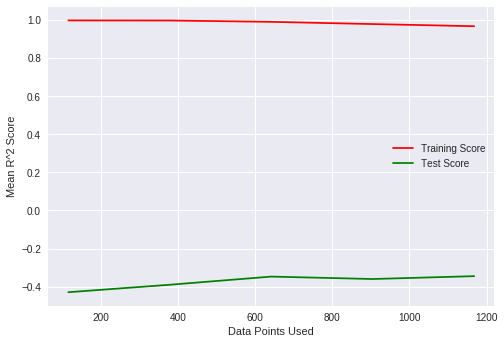

In [0]:
from sklearn.model_selection import learning_curve

# We'll want to do this again later, so we'll define a function for it
def plot_learning_curve(model):
  train_sizes_abs, train_scores, test_scores = learning_curve(model, X, y, cv = 5)

  # Plot learning curves
  plt.plot(train_sizes_abs, np.mean(train_scores, axis = 1), color = 'r')
  plt.plot(train_sizes_abs, np.mean(test_scores, axis = 1), color = 'g')
  plt.xlabel("Data Points Used")
  plt.ylabel("Mean R^2 Score")
  _ = plt.legend(["Training Score", "Test Score"])
  
plot_learning_curve(dectree)

Learning curves plot the training score and mean cross-validation score of a model against the number of data points used to train the model. A low training score indicates high bias. A low cross-validation score (or a large distance between the two curves) indicates high variance.

A near-perfect training score accompanied by an awful test score, as seen in the graph above, is textbook overfitting. Since the $R^2$ score is so close to $1$, it looks like our decision tree might even have an individual node for each data point, and that's definitely not okay. We'll restrict the depth of the tree to see if we get better results.

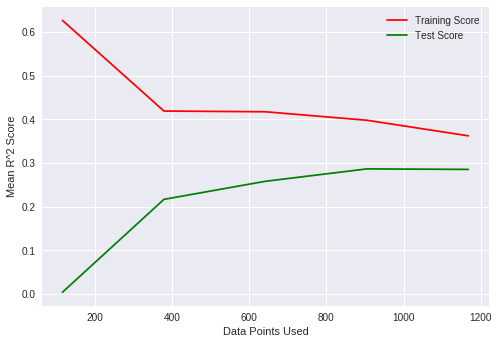

In [0]:
plot_learning_curve(DecisionTreeRegressor(max_depth = 4))

Our test score has increased, but our training score has actually decreased. This is because there's often a trade-off between bias and variance; unless we're picking a model that better represents whatever trend we're observing, reducing overfitting can only be done by lowering a model's sensitivity to patterns, which causes underfitting, and vice versa. Still, perhaps a different model can give us better variance without increasing bias by too much. Random forests, for example, deal with decision trees' susceptibility to overfitting by combining many decision trees. Let's try using a random forest instead of a single decision tree.

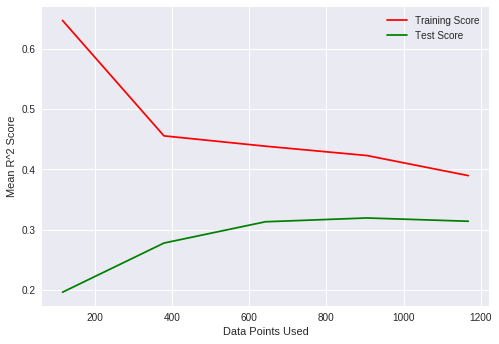

In [0]:
from sklearn.ensemble import RandomForestRegressor

plot_learning_curve(RandomForestRegressor(n_estimators = 10, max_depth = 4))

In this case, we see a slight increase in both training and test score. Notice how the test score when using fewer than 200 data points has risen from $0.1$ to $0.2$. We have enough data right now that we don't really notice the difference, but it's clear that a random forest would be more robust than a single decision tree if we had very little data.

Now let's compare the models. We'll run 10-fold cross-validation on with our `RandomForestRegressor` and compare the results with those of the linear regression model.

In [0]:
randfrst_cv = cross_val_score(RandomForestRegressor(n_estimators = 10, max_depth = 4), X, y, cv = 10)
randfrst_cv

array([0.33943577, 0.24827683, 0.35018325, 0.34877948, 0.32148745,
       0.3338345 , 0.5138408 , 0.31195115, 0.20815349, 0.1998223 ])

At a glance, this looks to be slightly better than our linear regression model, but we should properly compare the scores to make sure. We'll use a violin plot to do this.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


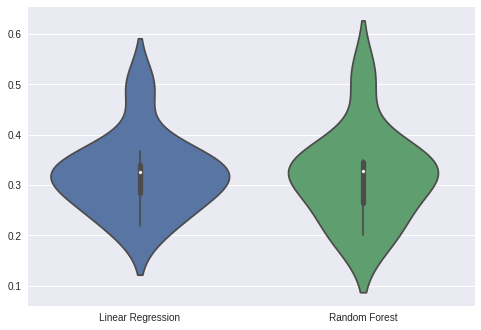

In [0]:
seaborn.violinplot(["Linear Regression"] * 10 + ["Random Forest"] * 10, np.concatenate([linreg_cv, randfrst_cv]))

Based on the violin plots, the linear regression model performed better than the random forest model overall seeing as its violin is slightly higher, but the random forest model was more robust, seeing as its lower tip is higher.

## Insights/ Next Steps

Intuitively it make sense that weather influences actions like crime, as crime is heavily influenced by enivironmental factors, such as light level. However from the results of this tutorial, It appears that weather is actually a very good predictor of the rates of crime; we were able to find a statistically significant relationship between our predictor variables and crime rates. 

As this tutorial comes to an end, there is a lot we can do with these results. We can look at other environmental factors and see if they influence crime rates. Another option would be to take a look back at crime data and see if environmental factors influence location or complaint type. A practical use of this information would be to use the result of this tutoral to account weather for crime analysis in New York. There is a lot more to learn in terms of the relationship between crime and weather and about data science. 